In [1]:
import sys
from random import random
sys.path.append('../')

In [2]:
from moed.model import Sequence, Model
from moed.analysis import Analysis
from moed.proc import Proc

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
x = [x/25 for x in range(500)]
n = 250

In [5]:
from math import sin, cos

In [6]:
signal = Sequence.from_func(x, lambda x: cos(x*4))
shifted = Sequence.from_func(x, lambda x: cos(x*4) + 10)
unshifted = signal - Analysis.avg(signal)
dtf_signal = Analysis.dtf(signal)
dtf_shifted = Analysis.dtf(shifted)
dtf_unshifted = Analysis.dtf(unshifted)

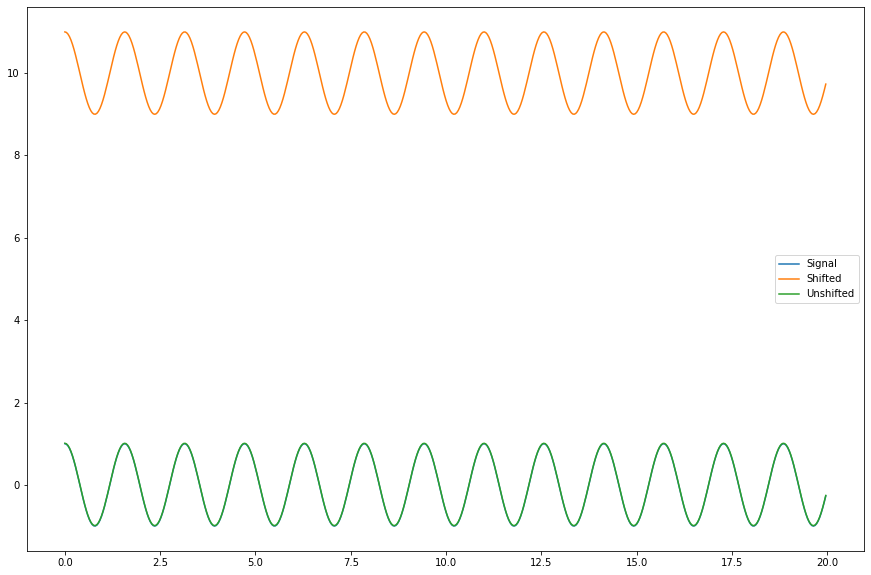

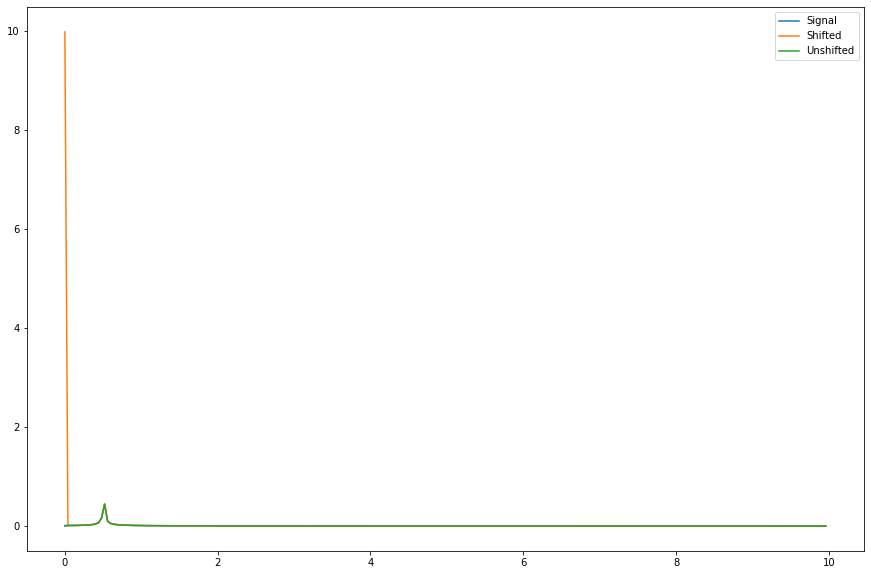

In [7]:
fig, axes = plt.subplots(1, figsize=(15, 10))
axes.plot(x, signal.y, label="Signal")
axes.plot(x, shifted.y, label="Shifted")
axes.plot(x, unshifted.y, label="Unshifted")
axes.legend()
plt.show()
fig, axes = plt.subplots(1, figsize=(15, 10))
axes.plot(x[:n], dtf_signal.y[:n], label="Signal")
axes.plot(x[:n], dtf_shifted.y[:n], label="Shifted")
axes.plot(x[:n], dtf_unshifted.y[:n], label="Unshifted")
axes.legend()
plt.show()


In [8]:
trended = signal + Model.linear(x, 0.2, 0)
untrended = Proc.untrend(trended, 50)
dtf_trended = Analysis.dtf(trended)
dtf_untrended = Analysis.dtf(untrended)

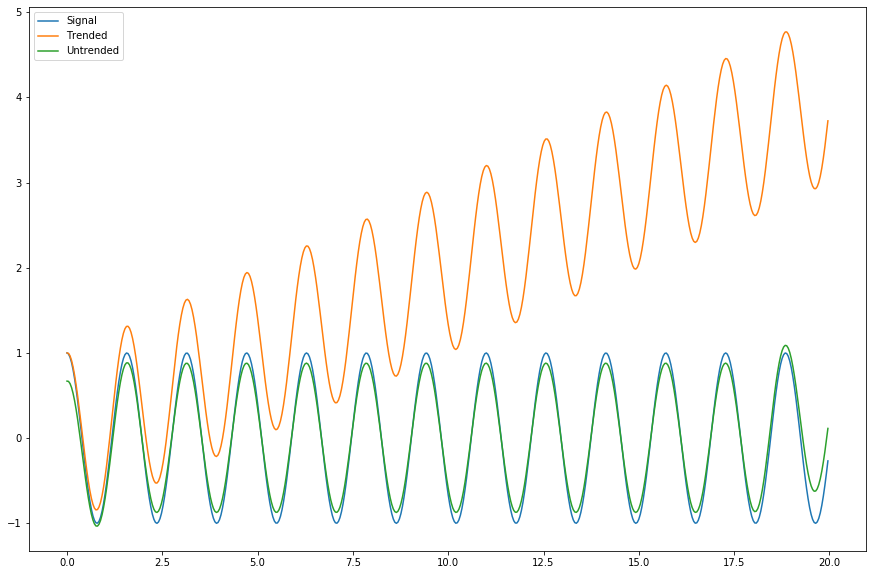

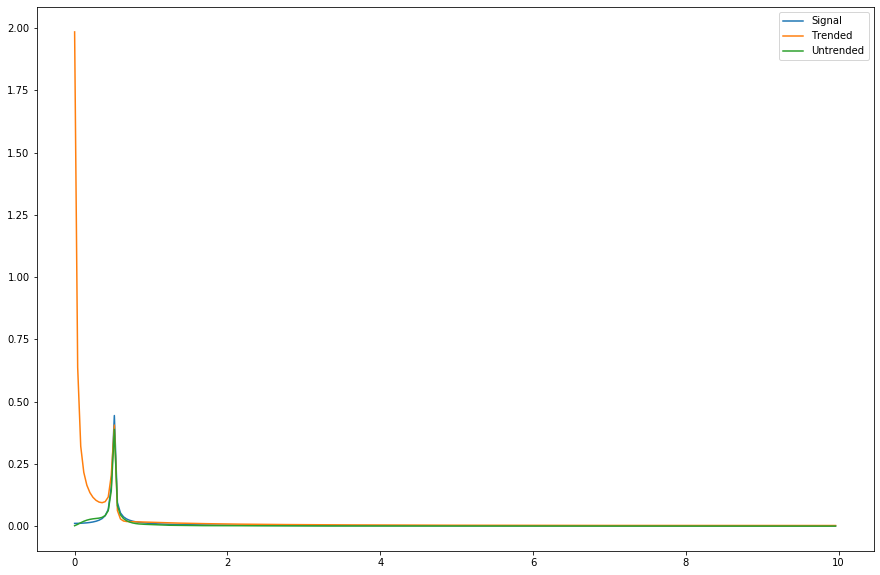

In [13]:
fig, axes = plt.subplots(1, figsize=(15, 10))
axes.plot(x, signal.y, label="Signal")
axes.plot(x, trended.y, label="Trended")
axes.plot(x, untrended.y, label="Untrended")
axes.legend()
plt.show()
fig, axes = plt.subplots(1, figsize=(15, 10))
axes.plot(x[:n], dtf_signal.y[:n], label="Signal")
axes.plot(x[:n], dtf_trended.y[:n], label="Trended")
axes.plot(x[:n], dtf_untrended.y[:n], label="Untrended")
axes.legend()
plt.show()


In [10]:
r = Sequence.from_func(x, lambda x: random())
line = Sequence.from_func(x, lambda x: 1)

from collections import OrderedDict
import copy

l = list(copy.copy(line.y))
spiked = Proc.spikes(l, 5, 100)
spiked = Sequence.from_dict(OrderedDict(zip(line.x, spiked)))

dtf_r = Analysis.dtf(r)
dtf_spiked = Analysis.dtf(spiked)

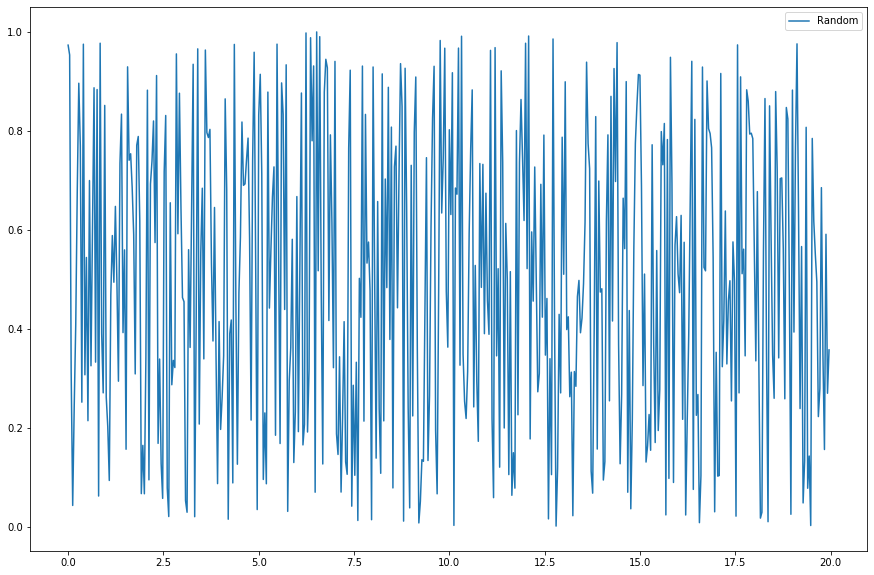

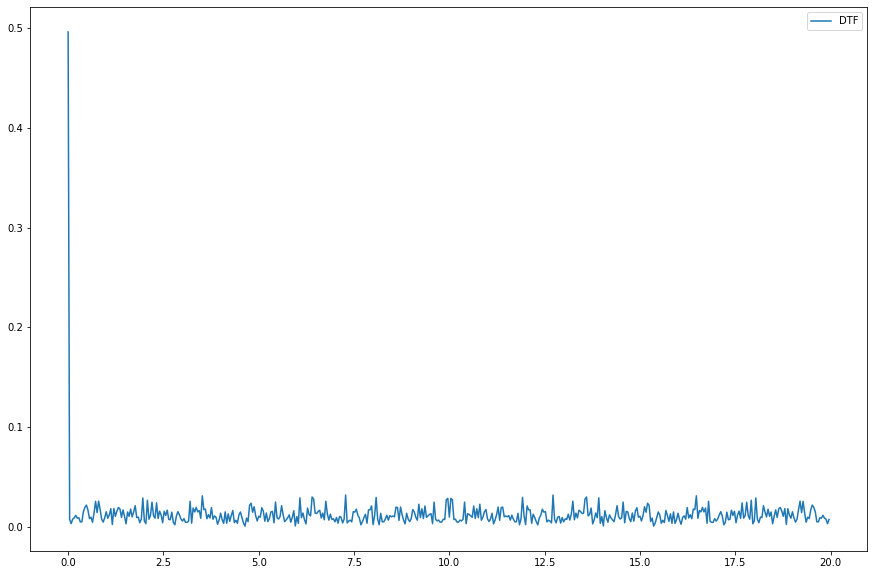

In [11]:
fig, axes = plt.subplots(1, figsize=(15, 10))
axes.plot(x, r.y, label="Random")
axes.legend()
plt.show()
fig, axes = plt.subplots(1, figsize=(15, 10))
axes.plot(x, dtf_r.y, label="DTF")
axes.legend()
plt.show()

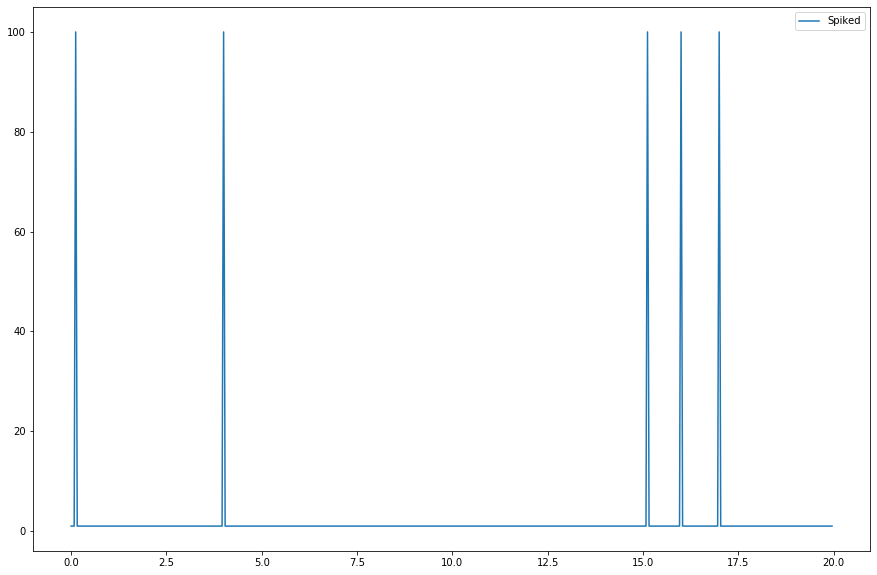

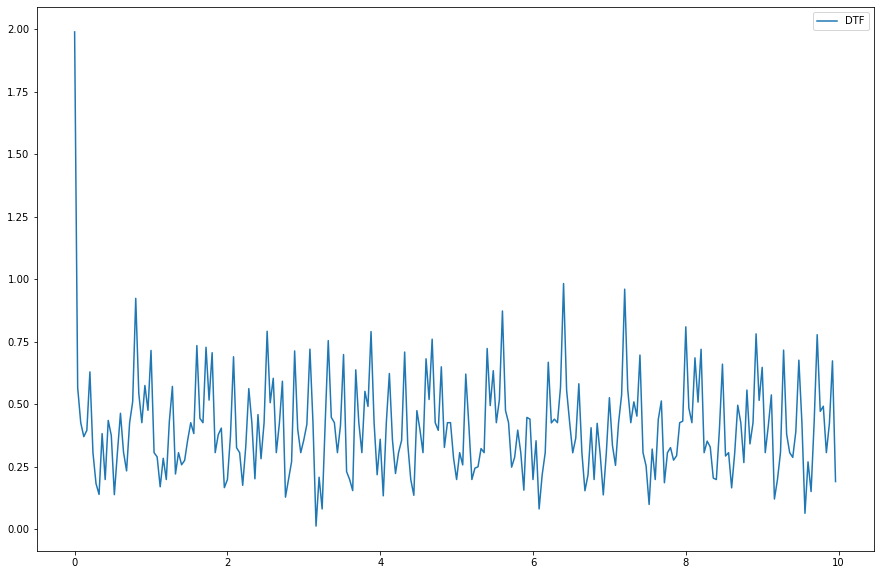

In [12]:
fig, axes = plt.subplots(1, figsize=(15, 10))
axes.plot(x, spiked.y, label="Spiked")
axes.legend()
plt.show()
fig, axes = plt.subplots(1, figsize=(15, 10))
axes.plot(x[:n], dtf_spiked.y[:n], label="DTF")
axes.legend()
plt.show()

In [31]:
h = Model.harmonic(x, freq=4)
r = Sequence.from_func(x, lambda x: random()-0.5)
s = h + r
dtf_s = Analysis.dtf(s)

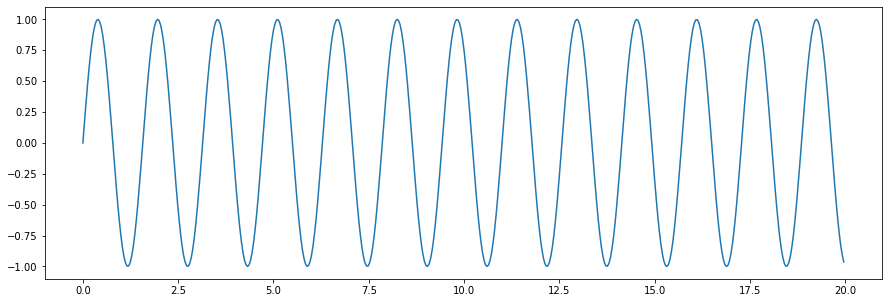

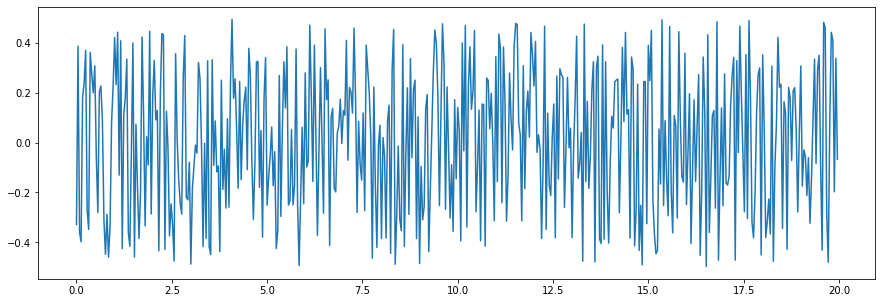

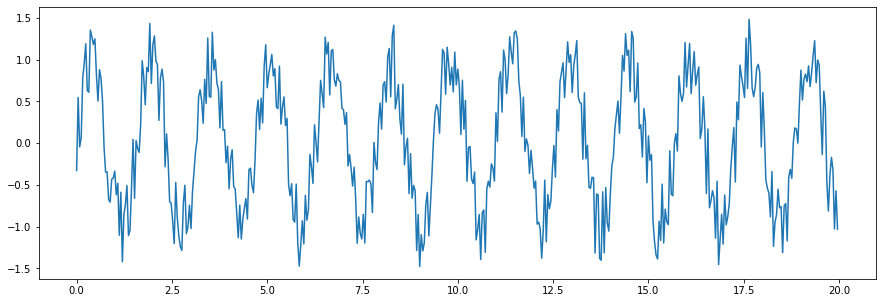

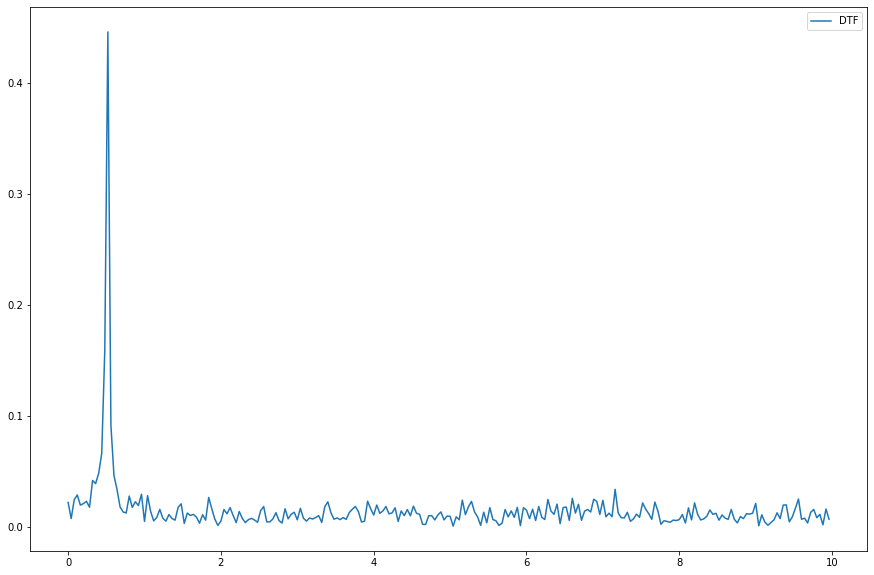

In [32]:
h.plot()
r.plot()
s.plot()

fig, axes = plt.subplots(1, figsize=(15, 10))
axes.plot(x[:n], dtf_s.y[:n], label="DTF")
axes.legend()
plt.show()

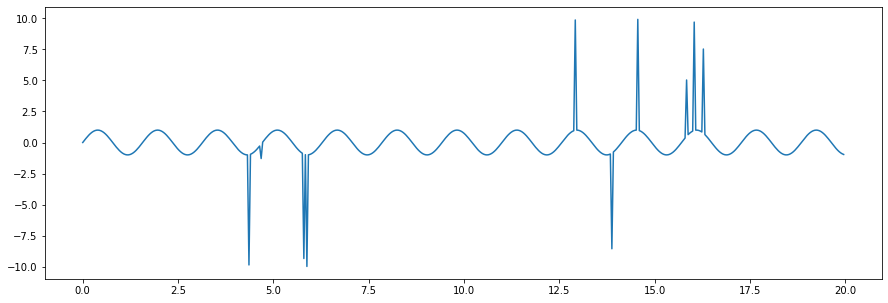

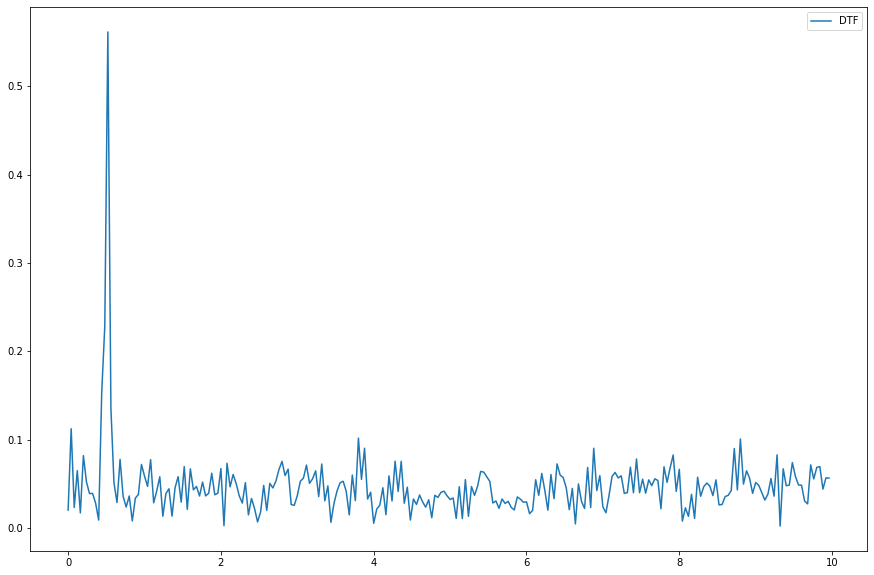

In [26]:
l = list(copy.copy(h.y))
spiked = Proc.spikes(l, 10, 10)
spiked = Sequence.from_dict(OrderedDict(zip(h.x, spiked)))
spiked.plot()

dtf_sp = Analysis.dtf(spiked)
fig, axes = plt.subplots(1, figsize=(15, 10))
axes.plot(x[:n], dtf_sp.y[:n], label="DTF")
axes.legend()
plt.show()